## hw1pr1: <i>Files!</i>
+ walking through folders and files  (500 files - or many more!)
+ analyzing, counting, inquiring, and <i>insight-producing</i> as we go!  

In [45]:
# Where are we?
%pwd

'/Users/jackyuan/Downloads/starting_notebooks'

By the way, when I run the above cell on my desktop machine (Mac), the response is

``'/Users/zacharydodds/Desktop/cs35/week1/starting_notebooks'``

on a Windows laptop, the path uses a different separator. Mine is

``'c:\\Users\\dodds\\OneDrive\\Desktop\\cs35\\week1\\starting_notebooks'``

Your results will almost certainly differ.

In fact, if they *don't* differ ... I'm _very_ interested! 🤔 🦔

In [20]:
# what's here?
%ls

get_files_challenge_and_place_here/ intro_first/
hw1pr0.ipynb                        intro_first_ss_small.png
hw1pr1.ipynb                        intro_second/


In [21]:
# to move around:  cd stands for "change directory" (a directory is a folder)
#    %cd intro_first    would move into the intro_first folder
#    %cd .. moves "up" to the containing directory
#    %cd .  doesn't move at all:  .  represents the current directory    

# For now, let's not move anywhere
%cd .

/Users/jackyuan/Downloads/starting_notebooks


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In 2024, my Mac setup succeeds with a ``UserWarning`` that tells me to install the ``pickleshare`` library.

I refuse based on snack-sharing principles!

One can only share freely, not under admonishment/warning!

(If this happens to you - let me know and we'll fix it...)

In [23]:
# we will use a few file-handling "system" libraries. 
# These are built-in to python, so nothing to install - just to import:
import os
import os.path

On first glance, it seems we can't open the file ``nottrue.ipynb`` ...

It's in the folder ``intro_first`` -- see if you can open it ...

In [25]:
#
# In fact, we can read it - it's just not a .ipynb file!
#
# Try it here, for your system:

print("+++ Contents of the file nottrue.ipynb: +++\n")

# Mac:    !cat  <filepath>  using forward slashes
#
# !cat ./intro_first/nottrue.ipynb       

# Windows:  type <filepath>  using backslashes
#
# !type .\\intro_first\\nottrue.ipynb       

+++ Contents of the file nottrue.ipynb: +++



We *could* use the command-line ``cat`` or ``type`` one file at a time ...

But, what if we have to walk _500 files_ ?!  <font size="-2">(Alas, this joke stays around for at least this whole week!)</font>

  + Then, we need a function - and script - to access its contents. 
  + We started this last week, let's revisit it again here:

In [26]:
#
# function to return the contents of a file (as one-big-string)
#

def GET_STRING_FROM_FILE(filename_as_string):
    """ return all of the contents from the file, filename
        will error if the file is not present, then return the empty string ''
    """
    try:
        # the encoding below is a common default, but not universal...
        file_object = open(filename_as_string, "r", encoding='utf-8')    # open! (Other encodings: 'latin-1', 'utf-16', 'utf-32') 
        file_data = file_object.read()                                   # and get all its contents
        file_object.close()                                              # close the file (optional)
        #print(DATA)                                                     # if we want to see it
        return file_data                                                 # definitely want to return it!
    except FileNotFoundError:                             # it wasn't there
        print(f"file not found: {filename_as_string}")    # print error
        return ''                                         # return empty string ''
    except UnicodeDecodeError:
        print(f"decoding error: {filename_as_string}")    # encoding/decoding error  
        return ''                                         # return empty string ''


full_file_path = "./intro_first/nottrue.ipynb"
file_contents = GET_STRING_FROM_FILE(full_file_path)      # reminder: file_contents = file_data from above

# Let's print only some of this potentially large string, adapting as needed:
print("file_contents:\n\n", file_contents[0:42])          # let's then increase the 42...

file_contents:

 Hi, everyone in cs35!

As you're seeing, t


Notice that, in Python, the Mac/forwardslash/style paths work, _even on Windows_

In [28]:
####  Let's try one of the other files!  (or a non-existent file!)

full_file_path = "./intro_first/cs/file35.txt"    # how about the others?!
file_contents = GET_STRING_FROM_FILE(full_file_path)     
print("file_contents:\n\n", file_contents[0:42])

file_contents:

 CS for Insight


#### But, we have 500 files...

Let's write <font color="DodgerBlue">_steppingstone_ functions</font> to make sense of our 500 files...

Let's start by reminding ourselves we can write a function that returns.

We'll call this Version 0:

In [29]:
#
# Steppingstone, Version 0: does Python work?
#

import os
import os.path

def file_walker(path):
    """ starting from the input, named path
        
        this function "walks" the whole path, including subfolders
        and then... explores any questions we might want :)

        call, for example, with    file_walker("./intro_first") 
    """
    return 42  # just to check that it's working (v0)    

#
# when discovering, keep your data close (and your functions closer!)
#
if True:
    """ overall script that runs examples """
    print(f"[[ Start! ]]\n")     # sign on

    path = "./intro_first"       # Remember: . means the current directory
    result = file_walker(path)   # Run!

    print(f"result = {result}")  # Yay for f-strings!

    print("\n[[ Fin. ]]")        # sign off


[[ Start! ]]

result = 42

[[ Fin. ]]


<hr>

#### Introducing ``os.walk``

The function ``os.walk(path)`` will walk _any number_ of files...

Before we write a function, let's try  ``os.walk`` immediately:

In [32]:
# os.walk returns the structure of a folder (directory)

# Here, we "walk" the intro_examples subfolder:
all_files = os.walk("./intro_first")

all_files     # oops! it's a "generator object"

<generator object walk at 0x10a67da20>

In [86]:
import os
L = list( os.walk( "./intro_first" ) )  
print(f"{len(L) = }")
print(f"{L = }")

len(L) = 5
L = [('./intro_first', ['cs', 'sci'], ['.DS_Store', 'nottrue.ipynb']), ('./intro_first/cs', [], ['.DS_Store', 'file35.txt', 'file181y.txt']), ('./intro_first/sci', ['50', '10'], ['.DS_Store']), ('./intro_first/sci/50', [], ['IDE.txt']), ('./intro_first/sci/10', [], ['IDE.txt'])]


Here's a line-wrapped version of the list ``L``
  + Below it, is a picture of the folder-and-file structure!  
  + Our goal: mind-mapping the two representations!!

``L = [('./intro_first', ['cs', 'sci'], ['.DS_Store', 'nottrue.ipynb']), 
('./intro_first/cs', [], ['.DS_Store', 'file35.txt', 'file181y.txt']), 
('./intro_first/sci', ['50', '10'], ['.DS_Store']), ('./intro_first/sci/50', [], ['IDE.txt']), ('./intro_first/sci/10', [], ['IDE.txt'])]``

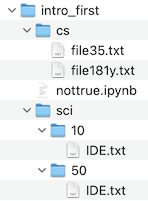

In [87]:
from IPython import display
#
# this is in the hw1pr1 folder
#
display.Image("./intro_first_ss_small.png")   # local image

See if you can match the _syntactic_ structure (the text!) with the _visual_ structure (the image!) 

<hr>

Onward!

In [88]:
path = "./intro_first"          # any path to any folder
result = list(os.walk(path))    # this will "walk" all of the subfolders and files

print(f"{len(result) = }")      # try c:/  (it took my machine 12.7 seconds!)
print(f"{result = }")

len(result) = 5
result = [('./intro_first', ['cs', 'sci'], ['.DS_Store', 'nottrue.ipynb']), ('./intro_first/cs', [], ['.DS_Store', 'file35.txt', 'file181y.txt']), ('./intro_first/sci', ['50', '10'], ['.DS_Store']), ('./intro_first/sci/50', [], ['IDE.txt']), ('./intro_first/sci/10', [], ['IDE.txt'])]


#### Now, let's incorporate ``os.walk`` into a series of functions...

In [57]:
#
# Steppingstone, Version 1: call os.walk, return length, optionally print
#

import os
import os.path

def file_walker(path):
    """ starting from the input, named path
        
        this function "walks" the whole path, including subfolders
        and then... explores any questions we might want :)

        call, for example, with    file_walker("./intro_first") 
    """
    result = list(os.walk(path))     # perhaps try w/o converting to a list...
    # print(f"{len(result) = }")
    # print(f"{result = }")
    num_folders = len(result)        # the len is the number of folders...
    return num_folders

#
# when discovering, keep your data close (and your functions closer!)
#
if True:
    """ overall script that runs examples """
    print(f"[[ Start! ]]\n")     # sign on

    path = "./intro_first"       # Remember: . means the current directory
    result = file_walker(path)   # Run!

    print(f"result = {result}")  # Yay for f-strings!

    print("\n[[ Fin. ]]")        # sign off


[[ Start! ]]

result = 5

[[ Fin. ]]


Ok!  But we didn't actually "walk" the folders -- or files! 

That is, we only counted, and didn't <u>consider</u>, each one...

Let's print all of the folder names!


In [18]:
#
# Steppingstone, Version 2: print all of the folder names!
#

import os
import os.path

def file_walker(path):
    """ starting from the input, named path
        
        this function "walks" the whole path, including subfolders
        and then... explores any questions we might want :)

        call, for example, with    file_walker("./intro_first") 
    """
    result = list(os.walk(path))     # perhaps try w/o converting to a list...

    for folder_tuple in result:
        currentpath, subfolders, files = folder_tuple  # always three items, always these...
        print(f"{currentpath = }")   # try non-f printing: it's worse!

    num_folders = len(result)        # the len is the number of currentpaths...
    return num_folders

#
# when discovering, keep your data close (and your functions closer!)
#
if True:
    """ overall script that runs examples """
    print(f"[[ Start! ]]\n")     # sign on

    path = "./intro_first"       # Remember: . means the current directory
    result = file_walker(path)   # Run!

    print(f"result = {result}")  # Yay for f-strings!

    print("\n[[ Fin. ]]")        # sign off


[[ Start! ]]

currentpath = './intro_first'
currentpath = './intro_first/cs'
currentpath = './intro_first/sci'
currentpath = './intro_first/sci/50'
currentpath = './intro_first/sci/10'
result = 5

[[ Fin. ]]


If you're on Windows, you likely see some "hidden MACOSX" directories, ``__MACOSX``

<font color="DodgerBlue"><b>Task!</b></font> 

Change the above code so that it _skips_ any path that contains the string ``__MACOSX``

We'll do this together...

<hr>

But, we want to see the files!

Let's print all their full filenames (the full paths)!

In [59]:
#
# Steppingstone, Version 3: walk all of the files, printing each one's fullpath
#

import os
import os.path

def file_walker(path):
    """ starting from the input, named path
        
        this function "walks" the whole path, including subfolders
        and then... explores any questions we might want :)

        call, for example, with    file_walker("./intro_first") 
    """
    result = list(os.walk(path))     # perhaps try w/o converting to a list...

    for folder_tuple in result:
        currentpath, subfolders, files = folder_tuple  # always three items, always these...

        if '__MACOSX' in currentpath: continue         # skip the rest of _this_ loop iteration: back to top

        print(f"{currentpath = }") 
        
        for file in files:       # remember, files is a list of filenames!
            fullpath = currentpath + "/" + file           # construct the full path, or, better: os.path.join(currentpath,file)  
            print(f"   {fullpath = }")
            #contents = GET_STRING_FROM_FILE(fullpath)     # use the fullpath!
            #print(f"{contents[0:42] = }")

    num_folders = len(result)        # the len is the number of currentpaths...
    return num_folders

#
# when discovering, keep your data close (and your functions closer!)
#
if True:
    """ overall script that runs examples """
    print(f"[[ Start! ]]\n")     # sign on

    path = "./intro_first"       # Remember: . means the current directory
    result = file_walker(path)   # Run!

    print(f"result = {result}")  # Yay for f-strings!

    print("\n[[ Fin. ]]")        # sign off


[[ Start! ]]

currentpath = './intro_first'
   fullpath = './intro_first/.DS_Store'
   fullpath = './intro_first/nottrue.ipynb'
currentpath = './intro_first/cs'
   fullpath = './intro_first/cs/.DS_Store'
   fullpath = './intro_first/cs/file35.txt'
   fullpath = './intro_first/cs/file181y.txt'
currentpath = './intro_first/sci'
   fullpath = './intro_first/sci/.DS_Store'
currentpath = './intro_first/sci/50'
   fullpath = './intro_first/sci/50/IDE.txt'
currentpath = './intro_first/sci/10'
   fullpath = './intro_first/sci/10/IDE.txt'
result = 5

[[ Fin. ]]


**Aside**: &nbsp;&nbsp; It's possible to assemble paths using the operating system's "correct" character:

In [60]:
os.path.join("/root/Users/secret_stuff" , "file_name")

'/root/Users/secret_stuff/file_name'

Notice that it _joined_ the path and the file.

<br>

Since Python is happy with ``/`` we'll use that for now.

<hr>

#### But, we want to get all of the files' _contents_  !

<u>Notice</u> there are lots of files named ``".DS_Store"`` ...

They are binary data used by MacOS - they will cause trouble!

Let's see the trouble, and then fix it:

In [42]:
#
# Steppingstone, Version 4: walk all of the files, printing (bits of) each one's contents!
#

import os
import os.path

def file_walker(path):
    """ starting from the input, named path
        
        this function "walks" the whole path, including subfolders
        and then... explores any questions we might want :)

        call, for example, with    file_walker("./intro_first") 
    """
    result = list(os.walk(path))     # perhaps try w/o converting to a list...

    for folder_tuple in result:
        currentpath, subfolders, files = folder_tuple  # always three items, always these...
        if '__MACOSX' in currentpath:  continue
        print(f"{currentpath = }") 

        for file in files:       # remember, files is a list of filenames!
            if file.startswith("."):  # Skip files that start with a dot
                continue

            fullpath = currentpath + "/" + file           # construct the full path, or, better: os.path.join(currentpath,file)  
            print(f"   {fullpath = }")

            contents = GET_STRING_FROM_FILE(fullpath)     # use the fullpath!
            print(f"   {contents[0:42] = }")

    num_folders = len(result)        # the len is the number of currentpaths...
    return num_folders

#
# when discovering, keep your data close (and your functions closer!)
#
if True:
    """ overall script that runs examples """
    print(f"[[ Start! ]]\n")     # sign on

    path = "./intro_first"       # Remember: . means the current directory
    result = file_walker(path)   # Run!

    print(f"result = {result}")  # Yay for f-strings!

    print("\n[[ Fin. ]]")        # sign off


[[ Start! ]]

currentpath = './intro_first'
   fullpath = './intro_first/nottrue.ipynb'
   contents[0:42] = "Hi, everyone in cs35!\n\nAs you're seeing, t"
currentpath = './intro_first/cs'
   fullpath = './intro_first/cs/file35.txt'
   contents[0:42] = 'CS for Insight'
   fullpath = './intro_first/cs/file181y.txt'
   contents[0:42] = 'CS for Inquiry'
currentpath = './intro_first/sci'
currentpath = './intro_first/sci/50'
   fullpath = './intro_first/sci/50/IDE.txt'
   contents[0:42] = 'Jupyter notebooks'
currentpath = './intro_first/sci/10'
   fullpath = './intro_first/sci/10/IDE.txt'
   contents[0:42] = 'Colab notebooks'
result = 5

[[ Fin. ]]


#### The encoding was wrong!  

(Those ``.DS_store`` files are binary, not human-readable.)

We could change to, say, latin-1 and see the bytes. But, let's not...

We really just want to _algorithmically_ skip over those files. Let's try it:

<font color="DodgerBlue"><b>Task to try</b></font>

Add an if statement in the above "steppingstone function" in order to simply skip over any file that begins with a dot (a period character: ``"."``)

Then, run it again. (It's ok to leave those dot files' pathnames - or not...)

<hr>

####  Two examples leading into our 10,000-file challenges! 

<u>Example 1</u> &nbsp; Let's count how many ``.txt`` files we have... 

In [43]:
#
# Rolodex lead-in, example1: counting the number of .txt files...
#

import os
import os.path

def file_walker(path):
    """ starting from the input, named path
        
        this function "walks" the whole path, including subfolders
        and then... explores any questions we might want :)

        call, for example, with    file_walker("./intro_first") 
    """
    result = list(os.walk(path))     # perhaps try w/o converting to a list...
    
    count_txt = 0    # keep count of our .txt files

    for folder_tuple in result:
        currentpath, subfolders, files = folder_tuple  # always three items, always these...
        if '__MACOSX' in currentpath:  continue
        print(f"{currentpath = }") 

        for file in files:       # remember, files is a list of filenames!
            fullpath = currentpath + "/" + file           # construct the full path, or, better: os.path.join(currentpath,file)  
            print(f"   {fullpath = }")
            if file[0] == ".": continue      # skip files that start with dot
            if file[-4:] == ".txt":
                print("Found a .txt file! Adding one...")
                count_txt += 1
            #contents = GET_STRING_FROM_FILE(fullpath)     # use the fullpath!
            #print(f"   {contents[0:42] = }")

    return count_txt   # phew, we're finally returning something else!

#
# when discovering, keep your data close (and your functions closer!)
#
if True:
    """ overall script that runs examples """
    print(f"[[ Start! ]]\n")     # sign on

    path = "./intro_first"       # Remember: . means the current directory
    result = file_walker(path)   # Run!

    print(f"num txt files = {result}")  # Yay for f-strings!

    print("\n[[ Fin. ]]")        # sign off


[[ Start! ]]

currentpath = './intro_first'
   fullpath = './intro_first/.DS_Store'
   fullpath = './intro_first/nottrue.ipynb'
currentpath = './intro_first/cs'
   fullpath = './intro_first/cs/.DS_Store'
   fullpath = './intro_first/cs/file35.txt'
Found a .txt file! Adding one...
   fullpath = './intro_first/cs/file181y.txt'
Found a .txt file! Adding one...
currentpath = './intro_first/sci'
   fullpath = './intro_first/sci/.DS_Store'
currentpath = './intro_first/sci/50'
   fullpath = './intro_first/sci/50/IDE.txt'
Found a .txt file! Adding one...
currentpath = './intro_first/sci/10'
   fullpath = './intro_first/sci/10/IDE.txt'
Found a .txt file! Adding one...
num txt files = 4

[[ Fin. ]]


<font color="DodgerBlue"><b>This is an example</b></font> of a short (1-3 sentence) markdown cell, giving interpretation and context for the above result...

#### Number of ``.txt`` files
  + It seems that this folder, ``intro_first`` has four (4) ``.txt`` files.  This seems reasonable!
  + We could go further and see what _percentage_ of files are ``.txt`` ... 
  + It's also worth noting that we're trusting the file extension ``.txt`` here: some text files could be masquerading as other things... 😊?!

The key idea is to ...
  + share the results found, contextualized for us sapiens ...
  + consider what else could be done, even if we're not doing so ...
  + note possible incompletenesses, countervailing forces, concerns in general ...
  + use emojis 🦔 !

<hr>

####  Second example: using file *contents* 

<u>Example 2</u> &nbsp; Let's count how many of the ``.txt`` files contain the substring ``'CS'`` -- not in the filename, but in the file ***contents***

In [63]:
#
# Rolodex lead-in, example2: counting the number of .txt files containing 'CS' ...
#

import os
import os.path

def file_walker(path):
    """ starting from the input, named path
        
        this function "walks" the whole path, including subfolders
        and then... explores any questions we might want :)

        call, for example, with    file_walker("./intro_first") 
    """
    result = list(os.walk(path))     # perhaps try w/o converting to a list...
    
    count_txt = 0    # keep count of our .txt files
    count_CS = 0     # keep count of 'CS' substrings found

    for folder_tuple in result:
        currentpath, subfolders, files = folder_tuple  # always three items, always these...
        if '__MACOSX' in currentpath:  continue
        print(f"{currentpath = }") 

        for file in files:       # remember, files is a list of filenames!
            fullpath = currentpath + "/" + file           # construct the full path, or, better: os.path.join(currentpath,file)  
            print(f"   {fullpath = }")
            if file[0] == ".": continue      # skip files that start with dot

            if file[-4:] == ".txt":
                # print("Found a .txt file! Adding one...")
                count_txt += 1
                contents = GET_STRING_FROM_FILE(fullpath)     # use the fullpath!
                if 'CS' in contents:
                    print("        *** Found a 'CS' ... adding 1    (aka 2-True)")
                    count_CS += 1
                # print(f"   {contents[0:42] = }")

    return count_CS, count_txt   # oooh... we can return two things!

#
# when discovering, keep your data close (and your functions closer!)
#
if True:
    """ overall script that runs examples """
    print(f"[[ Start! ]]\n")     # sign on

    path = "./intro_first"       # Remember: . means the current directory
    result = file_walker(path)   # Run!

    count_CS, count_txt = result
    print()
    print(f"num txt files       = {count_txt}")  
    print(f"num containing CS   = {count_CS}")  
    perc = count_CS*100/count_txt
    print(f"for a CS percentage of {perc:5.2f}%")   # :5.2f means width of 5, 2 dec. places, for a _floating pt value

    print("\n[[ Fin. ]]")        # sign off


[[ Start! ]]

currentpath = './intro_first'
   fullpath = './intro_first/.DS_Store'
   fullpath = './intro_first/nottrue.ipynb'
currentpath = './intro_first/cs'
   fullpath = './intro_first/cs/.DS_Store'
   fullpath = './intro_first/cs/file35.txt'
        *** Found a 'CS' ... adding 1    (aka 2-True)
   fullpath = './intro_first/cs/file181y.txt'
        *** Found a 'CS' ... adding 1    (aka 2-True)
currentpath = './intro_first/sci'
   fullpath = './intro_first/sci/.DS_Store'
currentpath = './intro_first/sci/50'
   fullpath = './intro_first/sci/50/IDE.txt'
currentpath = './intro_first/sci/10'
   fullpath = './intro_first/sci/10/IDE.txt'

num txt files       = 4
num containing CS   = 2
for a CS percentage of 50.00%

[[ Fin. ]]


<font color="Coral"><b>Results:</b></font> 

#### Number of ``CS``-content ``.txt`` files
  + It seems that this folder, ``intro_first`` has two ``'CS'``-containing ``.txt`` files, out of four total ``.txt`` files, that is, ``50%`` <br><br>
  + <u>Reflection</u>: _This seems computationally balanced._ <br><br>
  + <u>Opportunities</u>: We could go further and try this in larger folders - such as this whole machine! Or, we could look for other things (like phone numbers or names in various formats). Or, really, we could ask-and-answer almost any algorithmic question about any subset of files on any machine at all... <br><br>
  +   _The fox knows many things, but the hedgehog knows one big thing._ - [Archilochus](https://www.goodreads.com/author/quotes/7614908.Archilochus#:~:text=Archilochus%20Quotes&text=We%20don't%20rise%20to,the%20level%20of%20our%20training.&text=The%20fox%20knows%20many%20things,hedgehog%20knows%20one%20big%20thing.&text=Heart%2C%20my%20heart%2C%20so%20battered,the%20men%20who%20hate%20us.) 🦔 

#### Trying other directories/folders

The ``path`` can be _any_ folder on your local machine, allowing for _arbitrary_ local exploration and discovery...

For example, this next cell will count <font color="Coral"><b>how many folders</b></font> do I have, starting at some ``path``
+ to count <font color="Coral"><b>files</b></font>, you'll need to build from the examples above

In [64]:
path = "./intro_first"          # any path to any folder?!  intro_first contains _5_ folders total
# path = "./intro_second"       # any path to any folder?!  intro_second contains _12_ folders total
# path = "./files_challenge"    # this is the really large folder: it contains _23_ folders total

# path = "C:/"                  # could use C:/  on windows or "/" on MacOS  
# path = "."                    # could use "." for the current directory

result = list(os.walk(path))    # this will "walk" all of the subfolders and files

print(f"{len(result) = }")      # this took my machine 2m 47.4s seconds (for "/" with total 555695 folders)
                                # and, it asked for permission a couple of times (I said no.)
#print(f"{result = }")          # let's _not_ print it out...

len(result) = 5


#### <font color="DodgerBlue"><b>Your task</b></font>: The Rolodex challenge!
+ Here is [the homework page that describes hw1's challenges...](https://docs.google.com/document/d/1SXgPlR00aIxahDi3OYR8y9-AODNwBuLbQsLLt9AKSa4/edit)
+ A few questions are "our" design
+ Then, ask-and-answer more are of _your_ design
+ And, you'll answer _your_ questions from at least two other "root" directories (the ``path`` that gets everything started is sometimes called the "root": the folder whose files your functions _walk_! :)
+ Create a short <font color="Coral"><b>Results:</b></font> section after each of "our" and _your_ questions. Feel free to use the template above.
+ Good luck, walking <i>far more</i> than one thousand files!

<br>


In [95]:
import os

def count_txtfiles(root_path):
    """Count the number of .txt files in a directory (including subdirectories)."""
    txt_count = sum(len([f for f in files if f.endswith('.txt')]) for _, _, files in os.walk(root_path))
    return txt_count

root_folder = "."  
print(f"Number of .txt files: {count_txtfiles(root_folder)}")


Number of .txt files: 72


<font color="Coral"><b>Results:</b></font> 

Number of .txt files: 72

In [94]:
def max_folder_depth(root_path):
    """Find the deepest folder depth in a directory tree."""
    return max(root.count(os.sep) for root, _, _ in os.walk(root_path)) - root_path.count(os.sep)

print(f"Max folder depth: {max_folder_depth(root_folder)}")


Max folder depth: 5


<font color="Coral"><b>Results:</b></font> 

Max folder depth: 5

In [96]:


def extract_digits(s):
    """Extract digits from a string."""
    return "".join(re.findall(r"\d", s))

def count_phone_numbers(root_path):
    """Count phone numbers based on digit length (7, 10, 11)."""
    phone_counts = {7: 0, 10: 0, 11: 0}

    for root, _, files in os.walk(root_path):
        for file in files:
            if file.endswith('.txt'):
                with open(os.path.join(root, file), 'r', encoding='utf-8') as f:
                    phone_number = extract_digits(f.readline().strip())
                    length = len(phone_number)
                    if length in phone_counts:
                        phone_counts[length] += 1

    return phone_counts

print(count_phone_numbers(root_folder))


{7: 32, 10: 23, 11: 5}


<font color="Coral"><b>Results:</b></font> 

{7: 32, 10: 23, 11: 5}

In [97]:
def count_909_numbers(root_path):
    """Count phone numbers that start with 909."""
    count_909 = 0

    for root, _, files in os.walk(root_path):
        for file in files:
            if file.endswith('.txt'):
                with open(os.path.join(root, file), 'r', encoding='utf-8') as f:
                    phone_number = extract_digits(f.readline().strip())
                    if len(phone_number) == 10 and phone_number.startswith("909"):
                        count_909 += 1

    return count_909

print(f"909 area code numbers: {count_909_numbers(root_folder)}")


909 area code numbers: 0


<font color="Coral"><b>Results:</b></font> 

909 area code numbers: 0

In [ ]:
def count_names_with_three_i(root_path):
    """Count names that contain at least three 'i's."""
    count = 0
    for root, _, files in os.walk(root_path):
        for file in files:
            if file.endswith('.txt'):
                with open(os.path.join(root, file), 'r', encoding='utf-8') as f:
                    f.readline() 
                    name = f.readline().strip()
                    if name.lower().count("i") >= 3:
                        count += 1
    return count

print(f"Names with three 'i's: {count_names_with_three_i(root_folder)}")


Names with three 'i's: 4


<font color="Coral"><b>Results:</b></font> 

Names with three 'i's: 4

In [101]:
def count_large_phone_numbers(root_path):
    """Count phone numbers with more than 10 digits."""
    count = 0
    for root, _, files in os.walk(root_path):
        for file in files:
            if file.endswith('.txt'):
                with open(os.path.join(root, file), 'r', encoding='utf-8') as f:
                    phone_number = extract_digits(f.readline().strip())
                    if len(phone_number) > 10:
                        count += 1
    return count

print(f"Numbers with more than 10 digits: {count_large_phone_numbers(root_folder)}")


Numbers with more than 10 digits: 5


<font color="Coral"><b>Results:</b></font> 

Numbers with more than 10 digits: 5

In [ ]:
import os

def count_last_name(root_path, last_name):
    """Count occurrences of a given last name in the dataset."""
    last_name = last_name.lower()
    count = 0

    for root, _, files in os.walk(root_path):
        for file in files:
            if file.endswith('.txt'): 
                file_path = os.path.join(root, file)
                with open(file_path, 'r', encoding='utf-8') as f:
                    f.readline() 
                    name_line = f.readline().strip().lower()

                    if not name_line:
                        print(f"Skipping empty name in {file_path}")
                        continue 

                    if "," in name_line:  
                        extracted_last_name = name_line.split(",")[0].strip()
                    else: 
                        name_parts = name_line.split()
                        if len(name_parts) < 2:
                            print(f"Unexpected format in {file_path}: '{name_line}'")
                            continue  
                        extracted_last_name = name_parts[-1] 

                    if extracted_last_name == last_name:
                        count += 1

    return count


root_folder = "./phonebook_data"  


print(f"People with last name 'CS35_Participant_4': {count_last_name(root_folder, 'CS35_Participant_4')}")
print(f"People with last name 'Smith': {count_last_name(root_folder, 'Smith')}")


People with last name 'CS35_Participant_4': 0
People with last name 'Smith': 0


<font color="Coral"><b>Results:</b></font> 

People with last name 'CS35_Participant_4': 0

People with last name 'Smith': 0

In [ ]:
def count_first_name(root_path, first_name):
    """Count occurrences of a given first name in the dataset."""
    first_name = first_name.lower()
    count = 0

    for root, _, files in os.walk(root_path):
        for file in files:
            if file.endswith('.txt'): 
                with open(os.path.join(root, file), 'r', encoding='utf-8') as f:
                    f.readline() 
                    name_line = f.readline().strip().lower()
                    
                    if "," in name_line: 
                        extracted_first_name = name_line.split(",")[1].strip()
                    else: 
                        extracted_first_name = name_line.split()[0]

                    if extracted_first_name == first_name:
                        count += 1

    return count

# Example usage
print(f"People with first name 'Jack': {count_first_name(root_folder, 'Jack')}")
print(f"People with first name 'Bob': {count_first_name(root_folder, 'Emily')}")


IndexError: list index out of range

<font color="Coral"><b>Results:</b></font> 

People with first name 'Jack': 0

People with first name 'Chris': 0

In [ ]:
def count_numbers_with_42(path):
    count = 0
    for root, _, files in os.walk(path):
        for file in files:
            if file.endswith('.txt'):
                file_path = os.path.join(root, file)
                with open(file_path, 'r', encoding='utf-8') as f:
                    phone_number = extract_digits(f.readline().strip())
                    print(f"Checking file: {file_path} | Phone: {phone_number}") 
                    if "42" in phone_number:
                        count += 1
    return count

root_folder = "./intro_second"

print(f"Numbers containing '42': {count_numbers_with_42(root_folder)}")


Checking file: ./intro_second/hp/samiam.txt | Phone: 
Checking file: ./intro_second/hp/hp1.txt | Phone: 
Checking file: ./intro_second/phone_files/02/0042.txt | Phone: 6044044078
Checking file: ./intro_second/phone_files/00/01.txt | Phone: 3465227890
Checking file: ./intro_second/phone_files/00/00.txt | Phone: 3754601
Checking file: ./intro_second/phone_files/00/02.txt | Phone: 7294843
Checking file: ./intro_second/phone_files/00/03.txt | Phone: 6713296288
Checking file: ./intro_second/phone_files/00/07.txt | Phone: 5912173
Checking file: ./intro_second/phone_files/00/06.txt | Phone: 2515446593
Checking file: ./intro_second/phone_files/00/10.txt | Phone: 7134680
Checking file: ./intro_second/phone_files/00/04.txt | Phone: 4317568367
Checking file: ./intro_second/phone_files/00/05.txt | Phone: 5355858
Checking file: ./intro_second/phone_files/00/08.txt | Phone: 2236381
Checking file: ./intro_second/phone_files/00/09.txt | Phone: 8972435
Checking file: ./intro_second/phone_files/01/0038.

<font color="Coral"><b>Results:</b></font> 

Numbers containing '42': 1

In [ ]:
from collections import Counter
import os

def most_common_first_name(root_path):
    """Find the most common first name in the dataset."""
    first_names = Counter()
    
    for root, _, files in os.walk(root_path):
        for file in files:
            if file.endswith('.txt'):
                file_path = os.path.join(root, file)
                with open(file_path, 'r', encoding='utf-8') as f:
                    f.readline() 
                    name_line = f.readline().strip()

                    if "," in name_line: 
                        first_name = name_line.split(",")[-1].strip()
                    else:  
                        name_parts = name_line.split()
                        first_name = name_parts[0] if name_parts else None

                    if first_name:
                        first_names[first_name] += 1

    return first_names.most_common(1)[0][0] if first_names else "No valid names found"


root_folder = "./intro_second"


print(most_common_first_name(root_folder))




Amy


<font color="Coral"><b>Results:</b></font> 

Most common first name: Amy

In [ ]:
def count_unique_last_names(root_path):
    """Count the number of unique last names in the dataset."""
    unique_last_names = set()
    
    for root, _, files in os.walk(root_path):
        for file in files:
            if file.endswith('.txt'):
                file_path = os.path.join(root, file)
                with open(file_path, 'r', encoding='utf-8') as f:
                    f.readline()  
                    name_line = f.readline().strip()

                    if "," in name_line:  
                        last_name = name_line.split(",")[0].strip()
                    else: 
                        name_parts = name_line.split()
                        last_name = name_parts[-1] if len(name_parts) > 1 else None

                    if last_name:
                        unique_last_names.add(last_name)

    return len(unique_last_names)


root_folder = "./intro_second"


print(f"Number of unique last names: {count_unique_last_names(root_folder)}")


Number of unique last names: 39


<font color="Coral"><b>Results:</b></font> 

Number of unique last names: 39

In [ ]:

import os


def count_total_files(root_path):
    """Count the total number of files in a directory and its subdirectories."""
    total_files = sum(len(files) for _, _, files in os.walk(root_path))
    return total_files


def find_deepest_path(root_path):
    """Find the deepest path depth in a directory tree."""
    max_depth = 0
    for root, _, _ in os.walk(root_path):
        depth = root[len(root_path):].count(os.sep) 
        max_depth = max(max_depth, depth)
    return max_depth


downloads_folder = "/Users/jackyuan/Downloads" 


total_files = count_total_files(downloads_folder)
deepest_path = find_deepest_path(downloads_folder)

print(f"Total number of files: {total_files}")
print(f"Deepest path depth: {deepest_path}")


Total number of files: 7083
Deepest path depth: 11


<font color="Coral"><b>Results:</b></font> 

Total number of files: 7083

Deepest path depth: 11

In [ ]:
import os


downloads_folder = "/Users/jackyuan/Downloads"


def count_screenshot_files(root_path):
    """Count the number of files with 'Screen Shot' in the filename."""
    count = 0
    for root, _, files in os.walk(root_path):
        for file in files:
            if "Screen Shot" in file:
                count += 1
    return count


def count_pdf_files(root_path):
    """Count the number of PDF files in the directory."""
    count = sum(1 for _, _, files in os.walk(root_path) for file in files if file.endswith('.pdf'))
    return count


def find_largest_file(root_path):
    """Find the largest file in the directory."""
    largest_file = None
    largest_size = 0
    for root, _, files in os.walk(root_path):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                size = os.path.getsize(file_path)
                if size > largest_size:
                    largest_file = file_path
                    largest_size = size
            except Exception:
                pass  

    return largest_file, largest_size


screenshot_count = count_screenshot_files(downloads_folder)
pdf_count = count_pdf_files(downloads_folder)
largest_file, largest_size = find_largest_file(downloads_folder)


print(f"Number of screenshot files: {screenshot_count}")
print(f"Number of PDF files: {pdf_count}")
print(f"Largest file: {largest_file} ({largest_size} bytes)")



Number of screenshot files: 1
Number of PDF files: 349
Largest file: /Users/jackyuan/Downloads/Discussion.mp4 (1292288173 bytes)


<font color="Coral"><b>Results:</b></font> 

Number of screenshot files: 1

Number of PDF files: 349

Largest file: /Users/jackyuan/Downloads/Discussion.mp4 (1292288173 bytes)

<font color="Coral"><b>Reflection:</b></font> 

These answers surprised me as I thought I would have more screenshot files. I was interested in why the largest file is a video so I looked through it. I discovered it was a pretty CS35_Participant_2 video that I recorded and edited for my class last year. The number of PDF files did not surprise me though.